# **Project Background**

This project is looking at utilising average houseprices to formulate a time series forcast for future potential house prices. Understanding the future houses prices of a region is really important to many stakeholders such as first time buyers, renters, home owners, local authorities, and private building contractors.

Being able to forcast potential changes in the market will help predict the price of houses and subsiquently help inform potential saving routines, development of houses, and whether to sell a house. The project uses data from the ONS and used multiple functions within Python to help validate the dataset.

Hypothesis: All properties value for London are going to increase overtime, and there will be strong growth in the next two years.

In [1]:
# data manipulation and analysis python packages
import pandas as pd
import numpy as np
import scipy

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of all seaborn plots to 'seaborn-darkgrid'
plt.style.use('seaborn-darkgrid')

# modelling and evaluation
import statsmodels
import statsmodels.api as sm

<ipython-input-1-7ee28f0c23e1>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
Houseprice_df = pd.read_csv('London Dataset All Builds.csv', index_col='Quarter', parse_dates=True, infer_datetime_format=True)
Houseprice_df.head()

<ipython-input-2-b35f761482b7>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Houseprice_df = pd.read_csv('London Dataset All Builds.csv', index_col='Quarter', parse_dates=True, infer_datetime_format=True)
<ipython-input-2-b35f761482b7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Houseprice_df = pd.read_csv('London Dataset All Builds.csv', index_col='Quarter', parse_dates=True, infer_datetime_format=True)


,All dwellings
Quarter,
1993-01-01,79289
1993-04-01,81224
1993-07-01,82674
1993-10-01,81307
1994-01-01,79678


In [3]:
# Set the index frequency to Quarter Start
Houseprice_df.index.freq = 'QS'

In [4]:
# https://stackoverflow.com/a/71340523
gaps = pd.date_range(start=min(Houseprice_df.index),
                     end=max(Houseprice_df.index),
                     freq='QS').difference(Houseprice_df.index)
gaps

DatetimeIndex([], dtype='datetime64[ns]', freq='QS-JAN')

In [5]:
Houseprice_df.isnull().sum() # check for null values..

All dwellings    0
dtype: int64

In [6]:
Houseprice_df = Houseprice_df.sort_index() # sort by date index

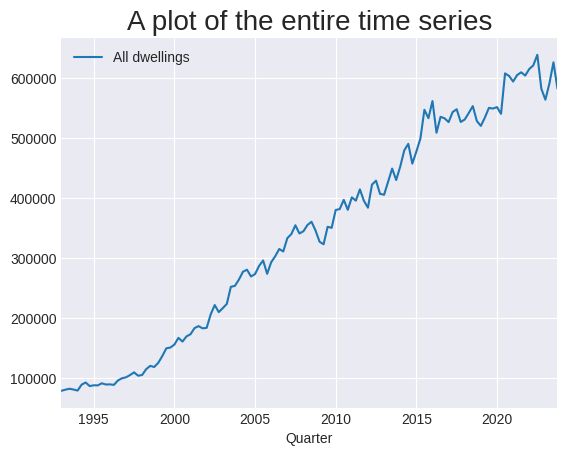

In [7]:
Houseprice_df.plot()

plt.title('A plot of the entire time series', fontsize = 20);

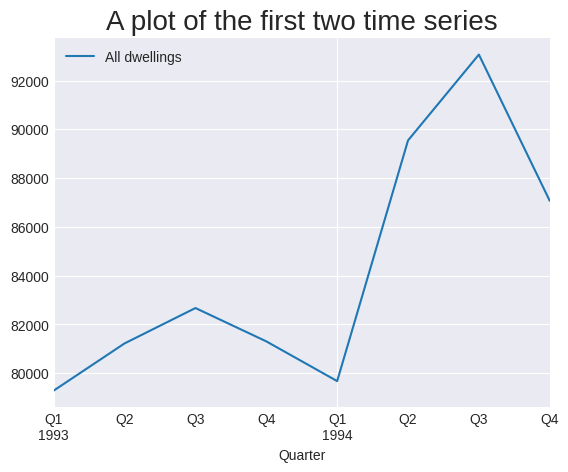

In [8]:
Houseprice_df.loc['1993':'1994'].plot()

plt.title("A plot of the first two time series", fontsize = 20);

In [9]:
Houseprice_df['4-MA'] =  Houseprice_df['All dwellings'].rolling(window=4,  center=True).mean()
Houseprice_df['6-MA'] =  Houseprice_df['All dwellings'].rolling(window=6,  center=True).mean()
Houseprice_df['12-MA'] = Houseprice_df['All dwellings'].rolling(window=12, center=True).mean()
Houseprice_df.head()

,All dwellings,4-MA,6-MA,12-MA
Quarter,,,,
1993-01-01,79289,NaN,NaN,NaN
1993-04-01,81224,NaN,NaN,NaN
1993-07-01,82674,81123.50,NaN,NaN
1993-10-01,81307,81220.75,82286.500000,NaN
1994-01-01,79678,83301.50,84582.833333,NaN


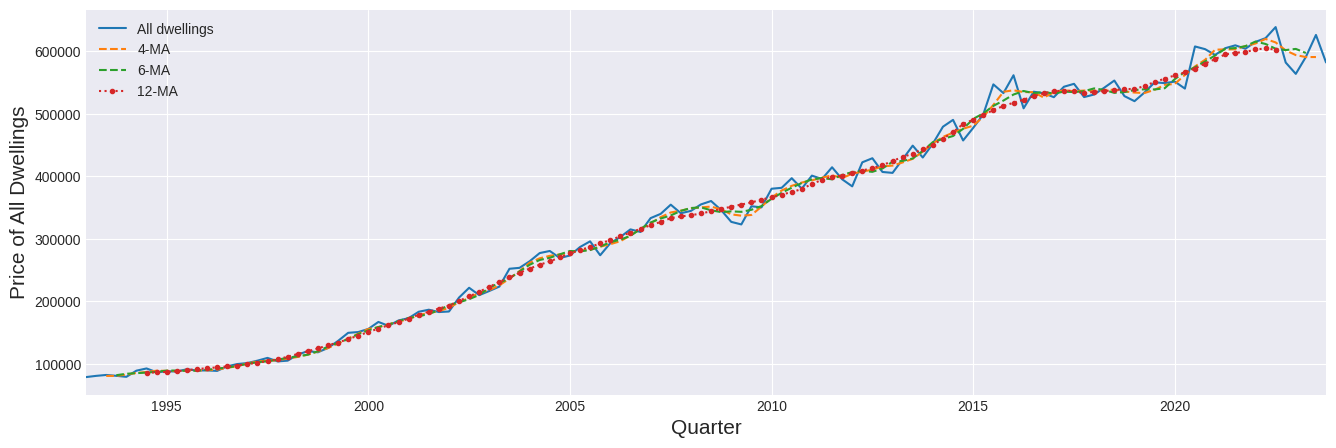

In [10]:
Houseprice_df.plot(style=['-','--','--',':.'],figsize=(16,5))

plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Price of All Dwellings', fontsize=15);

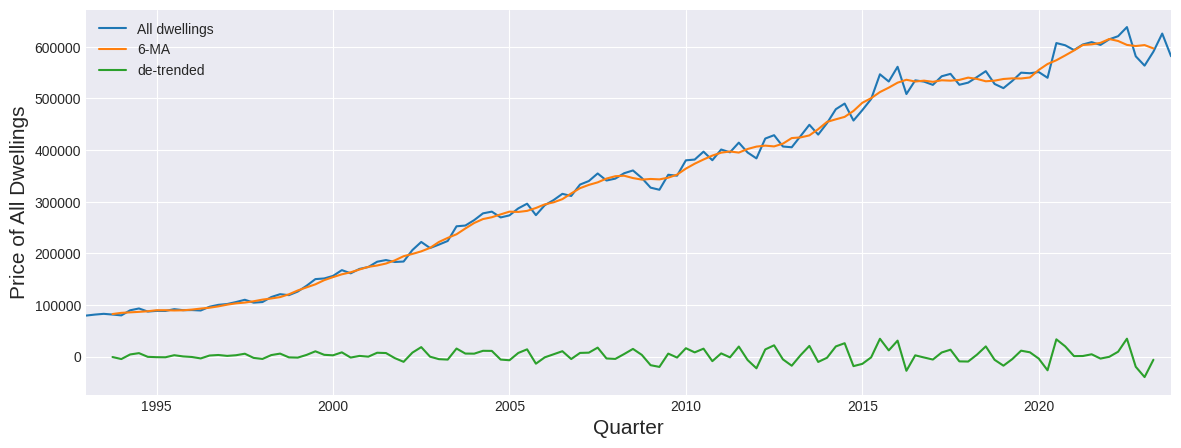

In [11]:
Houseprice_df['de-trended'] = Houseprice_df['All dwellings'] - Houseprice_df['6-MA']

Houseprice_df[['All dwellings','6-MA','de-trended']].plot(figsize=(14,5));

plt.xlabel('Quarter', fontsize = 15)
plt.ylabel('Price of All Dwellings', fontsize = 15);

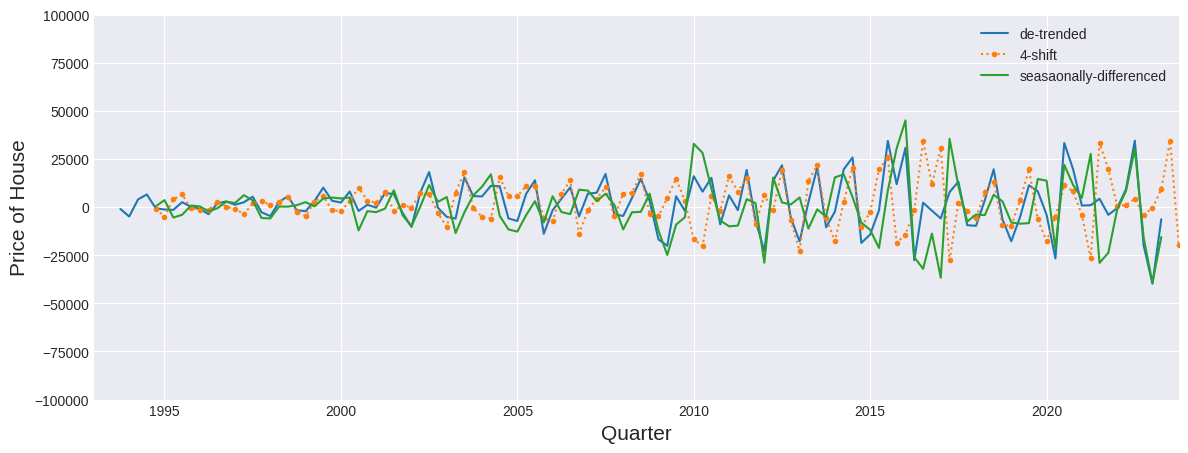

In [12]:
Houseprice_df['4-shift'] = Houseprice_df['de-trended'].shift(periods=4)

Houseprice_df['seasaonally-differenced'] = Houseprice_df['de-trended']- Houseprice_df['4-shift']

Houseprice_df[['de-trended', '4-shift', 'seasaonally-differenced']].plot(style=['-', ':.'],figsize=(14,5))


plt.ylim(-100000,100000)
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Price of House', fontsize=15);

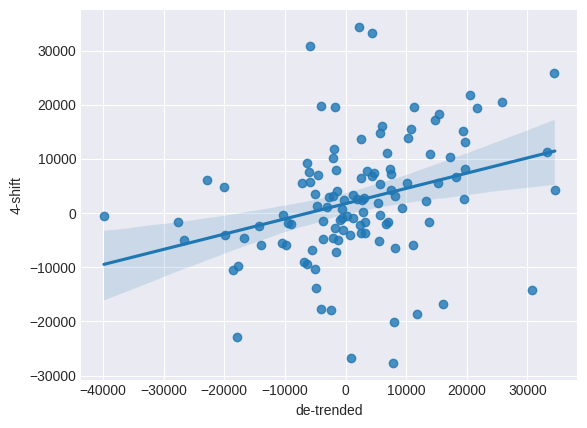

In [13]:
sns.regplot(data=Houseprice_df, x='de-trended', y='4-shift');

In [14]:
Houseprice_df['de-trended'].corr(Houseprice_df['4-shift']).round(2)

0.31

In [15]:
for shift in range(1,16):
    print(shift,':',Houseprice_df['de-trended'].corr(Houseprice_df['de-trended'].shift(shift)).round(2))

1 : 0.04
2 : -0.43
3 : -0.27
4 : 0.31
5 : 0.05
6 : -0.11
7 : -0.05
8 : 0.22
9 : -0.22
10 : -0.2
11 : 0.05
12 : 0.32
13 : -0.06
14 : -0.28
15 : -0.05


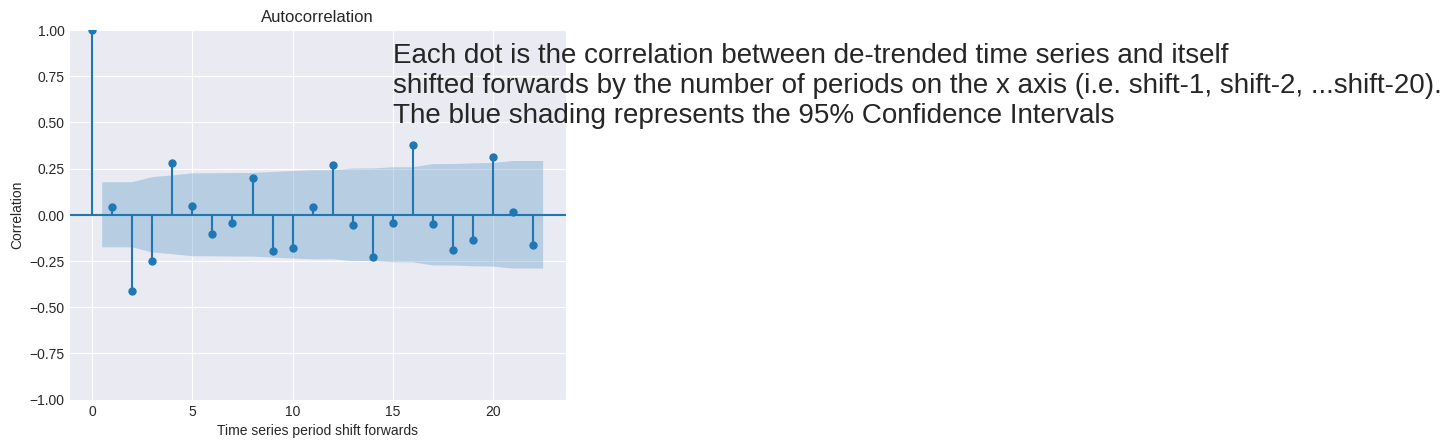

In [16]:
from statsmodels.graphics import tsaplots

tsaplots.plot_acf(Houseprice_df['de-trended'],missing='drop',lags=22,alpha=0.05)

plt.xlabel('Time series period shift forwards')
plt.ylabel('Correlation')

plt.text(15,0.5,"""Each dot is the correlation between de-trended time series and itself
shifted forwards by the number of periods on the x axis (i.e. shift-1, shift-2, ...shift-20).
The blue shading represents the 95% Confidence Intervals""", fontsize = 20);

<ipython-input-17-941de2659523>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Houseprice_df = pd.read_csv('London Dataset All Builds.csv', index_col='Quarter', parse_dates=True)


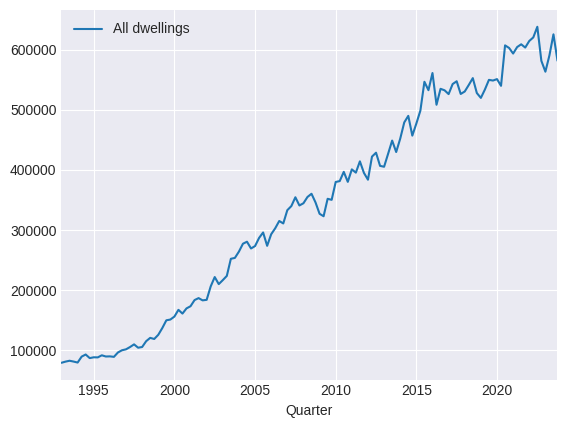

In [17]:
Houseprice_df = pd.read_csv('London Dataset All Builds.csv', index_col='Quarter', parse_dates=True)
Houseprice_df.index.freq='QS'
Houseprice_df.plot();

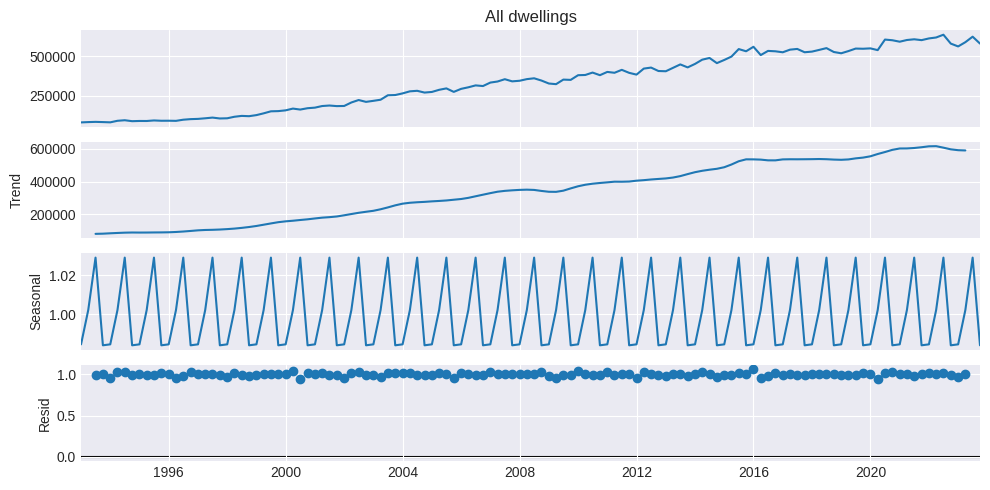

In [18]:
decomp=sm.tsa.seasonal_decompose(Houseprice_df['All dwellings'], model='multiplicative', period=4)
fig = decomp.plot()
fig.set_size_inches((10, 5))
fig.tight_layout()
plt.show()

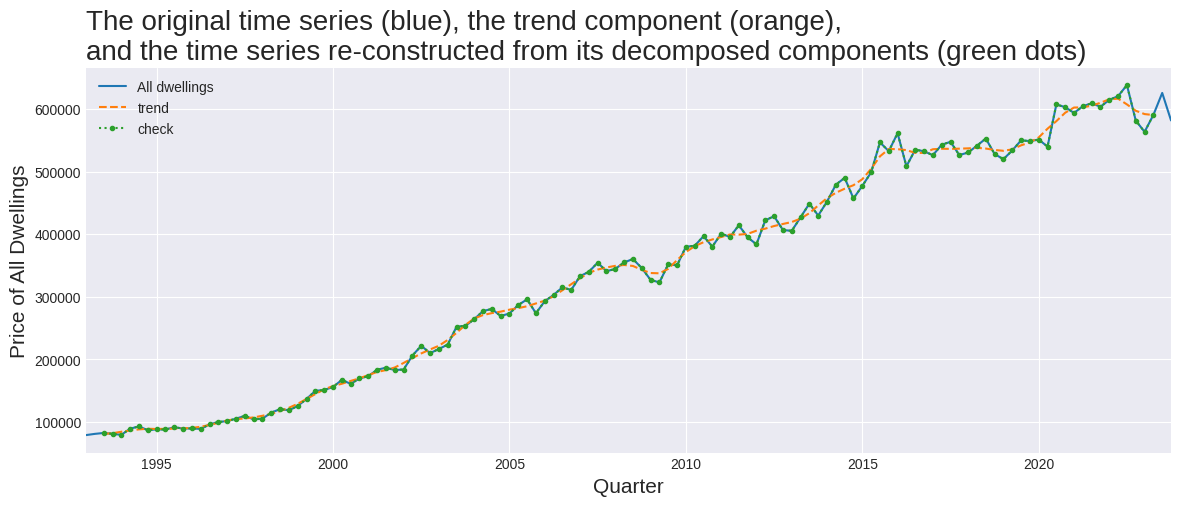

In [19]:
df=decomp.observed.to_frame().join(decomp.resid).join(decomp.trend).join(decomp.seasonal)
df['check'] = df['resid'] * df['trend'] * df['seasonal']
df[['All dwellings','trend','check']].plot(style=['-','--',':.'],figsize=(14,5))

plt.title("""The original time series (blue), the trend component (orange),
and the time series re-constructed from its decomposed components (green dots)""", fontsize = 20,loc='left')
plt.xlabel('Quarter', fontsize = 15)
plt.ylabel('Price of All Dwellings', fontsize = 15);

In [20]:
train_data =  Houseprice_df[:'2019']
test_data = Houseprice_df['2020':]

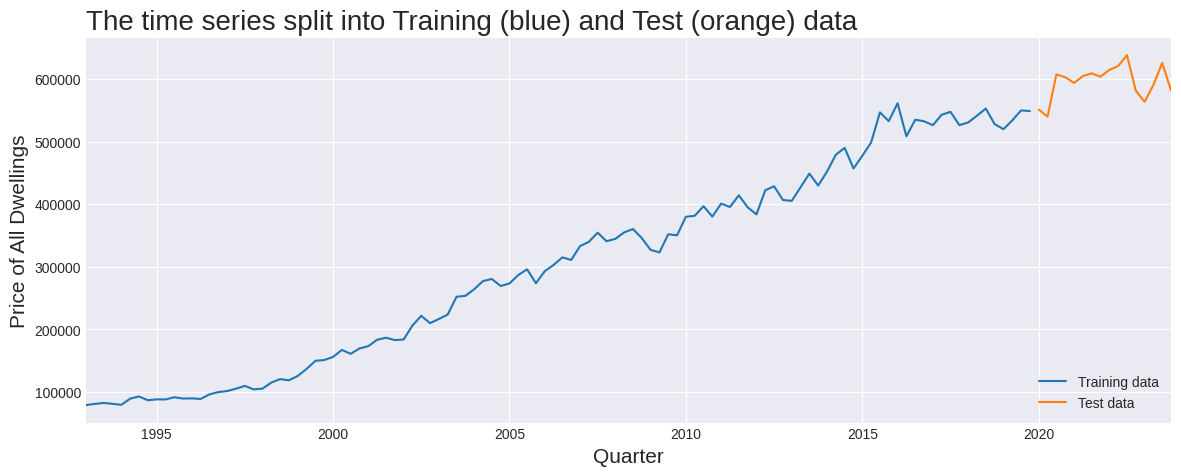

In [21]:
ax = train_data.plot()
test_data.plot(ax=ax,style=['-','--'],figsize=(14 ,5))
plt.legend(labels=['Training data', 'Test data'], loc=4)

plt.title("""The time series split into Training (blue) and Test (orange) data""", fontsize=20, loc='left')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Price of All Dwellings', fontsize=15);

In [22]:
ets_model_simple= sm.tsa.ETSModel(train_data['All dwellings'].astype('float64'),
                                error='add',
                                trend=None,
                                seasonal=None).fit()

ets_model_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:          All dwellings   No. Observations:                  108
Model:                       ETS(ANN)   Log Likelihood               -1193.432
Date:                Wed, 08 May 2024   AIC                           2392.863
Time:                        07:30:20   BIC                           2400.910
Sample:                    01-01-1993   HQIC                          2396.126
                         - 10-01-2019   Scale                    232106728.344
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.8508      0.096      8.833      0.000       0.662       1.040
initial_level    7.845e+04   1.51e+04      5.206      0.000    4.89e+04    1.08e+05
===================================================================================
Ljung-Box (Q):                        3.91   Jarque-Bera (JB):                14.77
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):              14.95   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

<ipython-input-23-c4e2f5e38b8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['fitted_values'] = ets_model_simple.fittedvalues


,All dwellings,fitted_values
Quarter,,
1993-01-01,79289,78446.400000
1993-04-01,81224,79163.272901
1993-07-01,82674,80916.512177
1993-10-01,81307,82411.759500
1994-01-01,79678,81471.844774


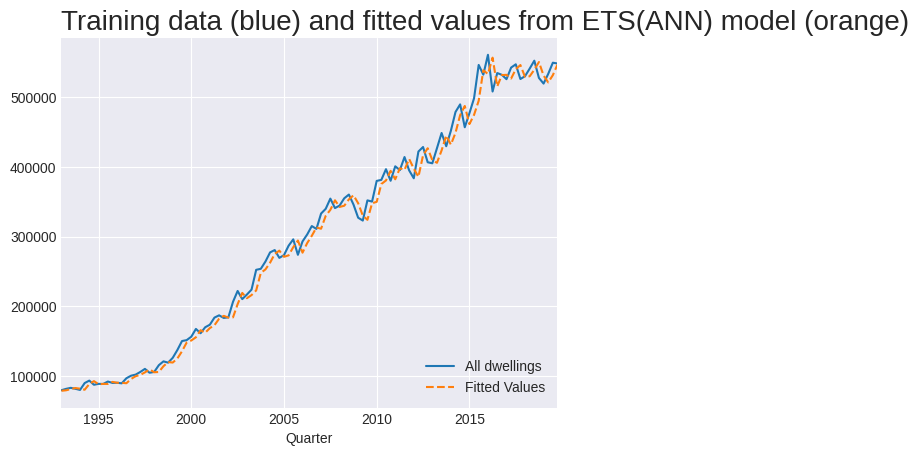

In [23]:
train_data['fitted_values'] = ets_model_simple.fittedvalues
train_data.plot(style=['-', '--'])

display(train_data.head())

plt.legend(labels=['All dwellings','Fitted Values'], loc=4)
plt.title('Training data (blue) and fitted values from ETS(ANN) model (orange)', fontsize=20, loc='left');

In [24]:
pd.options.mode.chained_assignment = None
test_data['ETS simple forecast (ANN)'] = ets_model_simple.forecast(steps=24)
test_data.head().style

,All dwellings,ETS simple forecast (ANN)
Quarter,,
2020-01-01 00:00:00,551079,548475.838450
2020-04-01 00:00:00,539924,548475.838450
2020-07-01 00:00:00,607198,548475.838450
2020-10-01 00:00:00,602902,548475.838450
2021-01-01 00:00:00,593618,548475.838450


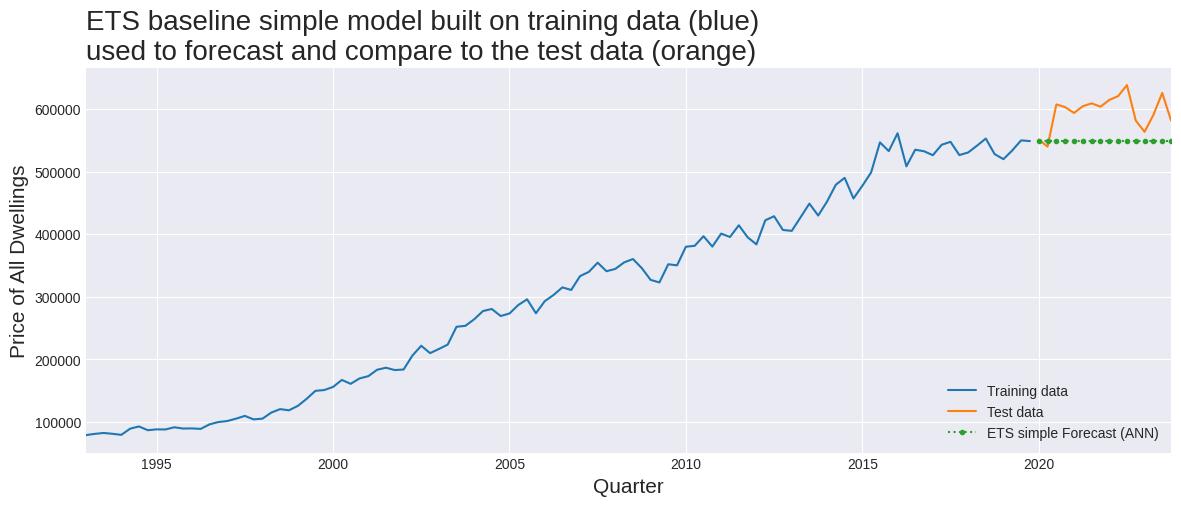

In [25]:
ax = train_data['All dwellings'].plot()
test_data.plot(ax=ax,style=['-',':.',':.'],figsize=(14,5))
plt.legend(labels=['Training data','Test data','ETS simple Forecast (ANN)'],loc=4)

plt.title("""ETS baseline simple model built on training data (blue)
used to forecast and compare to the test data (orange)""", fontsize = 20,loc='left')
plt.xlabel('Quarter', fontsize = 15)
plt.ylabel('Price of All Dwellings', fontsize = 15);

24981.65  (Root Mean Squared Error RMSE)
3.65  (Mean Absolute Percentage Error MAPE)


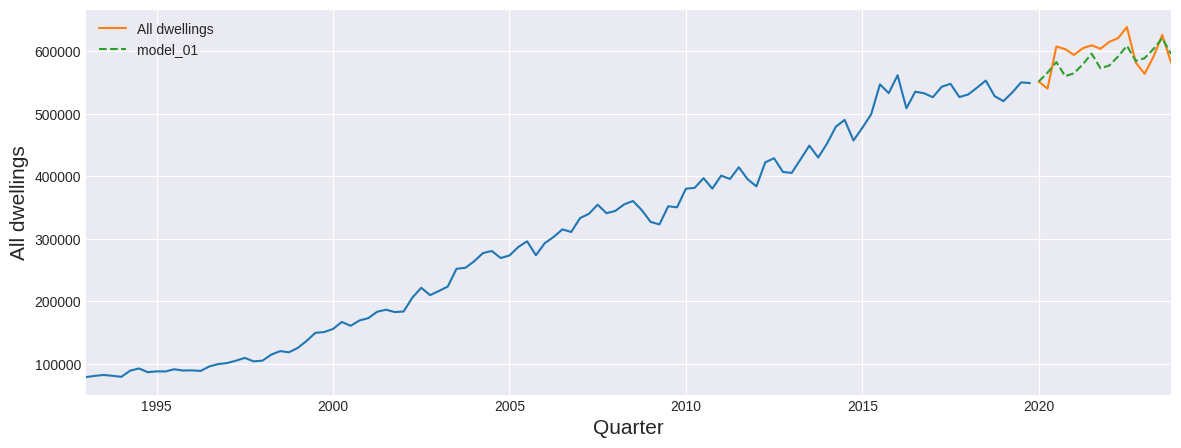

In [26]:
import numpy as np

# https://stats.stackexchange.com/a/294069
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 1: Build Model on training data
model_01= sm.tsa.ETSModel(train_data['All dwellings'].astype('float64'),
                          error='mul',
                          trend='mul',
                          damped_trend=True,
                          seasonal='mul',
                          seasonal_periods=4,
                          freq='QS').fit()

# 2: Use model to forecast across same time span as test data
test_data['model_01'] = model_01.forecast(steps=108) # does the forecast on the test data

# 3: Plot forecast against real values in test data
ax = train_data['All dwellings'].loc['1993':].plot()
test_data[['All dwellings','model_01']].plot(ax=ax,style=['-', '--', ':.'],figsize=(14, 5))
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('All dwellings', fontsize=15);

# 4: Compare forecast to actual values statistically in test data
rmse = sm.tools.eval_measures.rmse(test_data['All dwellings'], test_data['model_01']).round(2)
mape = mean_absolute_percentage_error(y_true=test_data['All dwellings'], y_pred=test_data['model_01'])
print(rmse, ' (Root Mean Squared Error RMSE)')
print(round(mape, 2), ' (Mean Absolute Percentage Error MAPE)')

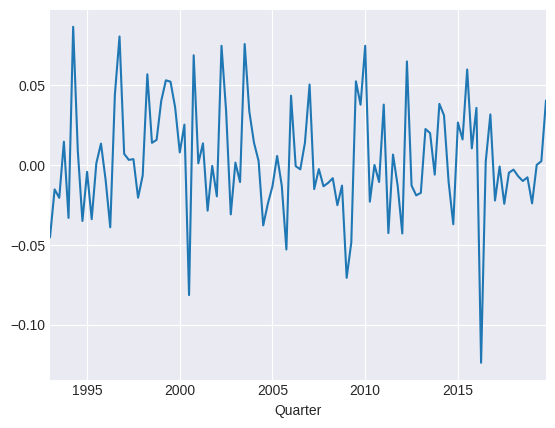

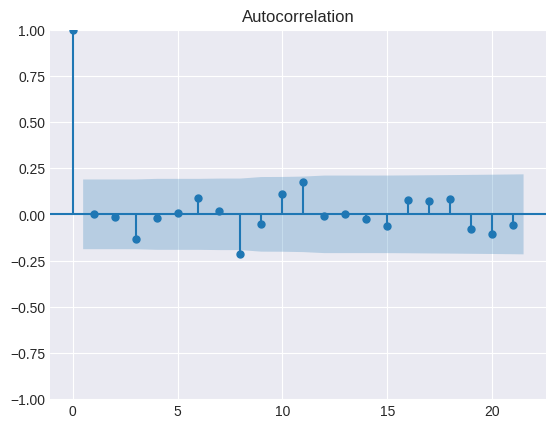

In [27]:
model_01.resid.plot();
statsmodels.graphics.tsaplots.plot_acf(model_01.resid,missing='drop',alpha=0.05,zero=True);

In [28]:
model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:          All dwellings   No. Observations:                  108
Model:                      ETS(MMdM)   Log Likelihood               -1135.546
Date:                Wed, 08 May 2024   AIC                           2293.093
Time:                        07:30:23   BIC                           2322.596
Sample:                    01-01-1993   HQIC                          2305.055
                         - 10-01-2019   Scale                            0.001
Covariance Type:               approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.8892      0.084     10.554      0.000       0.724       1.054
smoothing_trend        0.0598        nan        nan        nan         nan         nan
smoothing_seasonal  1.108e-05        nan        nan        nan         nan         nan
damping_trend          0.9800        nan        nan        nan         nan         nan
initial_level        8.16e+04        nan        nan        nan         nan         nan
initial_trend          1.0180        nan        nan        nan         nan         nan
initial_seasonal.0     0.9975        nan        nan        nan         nan         nan
initial_seasonal.1     1.0439        nan        nan        nan         nan         nan
initial_seasonal.2     1.0198        nan        nan        nan         nan         nan
initial_seasonal.3     1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                        8.53   Jarque-Bera (JB):                 4.02
Prob(Q):                              0.38   Prob(JB):                         0.13
Heteroskedasticity (H):               0.85   Skew:                            -0.08
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [29]:
# Fit a final ETS model with chosen parameters
final_model= sm.tsa.ETSModel(Houseprice_df['All dwellings'].astype('float64'),
                             error='mul',
                             trend='mul',
                             damped_trend=False,
                             seasonal='mul',
                             seasonal_periods=4,
                             freq='QS').fit()

In [30]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:          All dwellings   No. Observations:                  124
Model:                       ETS(MMM)   Log Likelihood               -1317.751
Date:                Wed, 08 May 2024   AIC                           2655.502
Time:                        07:30:23   BIC                           2683.705
Sample:                    01-01-1993   HQIC                          2666.959
                         - 10-01-2023   Scale                            0.001
Covariance Type:               approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.8983      0.096      9.395      0.000       0.711       1.086
smoothing_trend        0.0428      0.031      1.396      0.163      -0.017       0.103
smoothing_seasonal  1.017e-05        nan        nan        nan         nan         nan
initial_level        8.16e+04        nan        nan        nan         nan         nan
initial_trend          1.0191      0.011     96.491      0.000       0.998       1.040
initial_seasonal.0     0.9991        nan        nan        nan         nan         nan
initial_seasonal.1     1.0460        nan        nan        nan         nan         nan
initial_seasonal.2     1.0185        nan        nan        nan         nan         nan
initial_seasonal.3     1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                        7.36   Jarque-Bera (JB):                 2.40
Prob(Q):                              0.50   Prob(JB):                         0.30
Heteroskedasticity (H):               0.86   Skew:                             0.05
Prob(H) (two-sided):                  0.64   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [31]:
pred = final_model.get_prediction(start='2024', end='2025')
df = pred.summary_frame(alpha=0.05)

df.head(8)

,mean,mean_numerical,pi_lower,pi_upper
2024-01-01,587852.570000,586764.642519,544806.321073,627630.624064
2024-04-01,602536.753799,601723.076114,539886.975537,658055.347445
2024-07-01,622812.676431,621536.572234,551141.941092,695250.943454
2024-10-01,598681.356167,597326.790345,522996.792855,684812.785459
2025-01-01,603056.123555,601216.317771,515857.156723,696357.949945


The overall trend shows that there is some growth is excpected, yet not as much as first time buyer prices.

This partially proves the hypthoesis correct as there is potential for growth, yet it is not as strong as initially expected.

The 95% accurate range is relative wide. This will impact the types of decsions and informed actions taken off the back of the analysis model. This is because the range of potential values is so varied it becomes hard to perform action based on this.

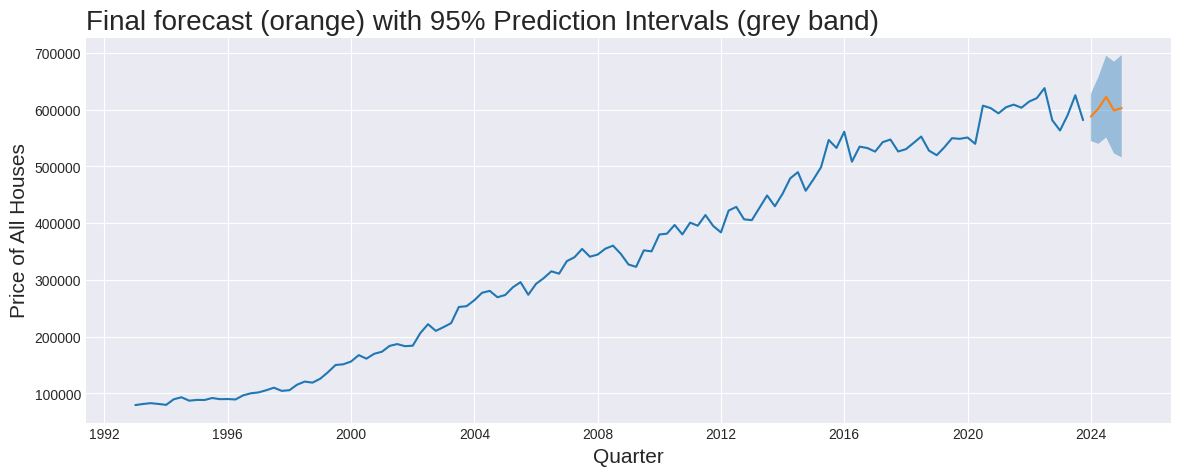

In [32]:
fig, ax = plt.subplots(figsize=(14,5))

ax.plot(Houseprice_df['All dwellings'])
ax.plot(df['mean'])
ax.fill_between(df.index,y1=df['pi_lower'],y2=df['pi_upper'], alpha=0.4)

plt.title("""Final forecast (orange) with 95% Prediction Intervals (grey band)""", fontsize = 20,loc='left')
plt.xlabel('Quarter', fontsize = 15)
plt.ylabel('Price of All Houses', fontsize = 15);